In [1]:
# import libraries
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
import pickle
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import *
from sklearn.preprocessing import normalize as N
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# read file
df_original=pd.read_csv("bike_sharing-Copy1.csv")

df =df_original
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.shape

(17379, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# checks for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# checks for duplicate values
df.duplicated().sum()

0

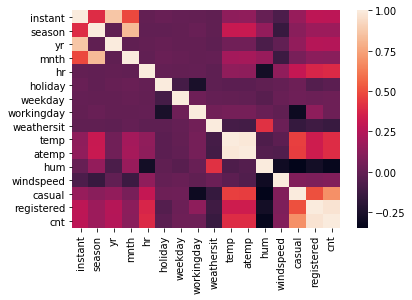

In [8]:
# checks correlation with all columns
corr=df.corr()
sb.heatmap(corr)

In [9]:
# checks correlation with all columns
print(corr['cnt'].sort_values(ascending=False)[:])

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


In [10]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
df = df[['registered','cnt']]

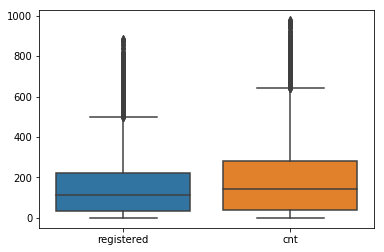

In [12]:
sb.boxplot(data=df)

In [13]:
# df = preprocess_obj.remove_outlier(df)

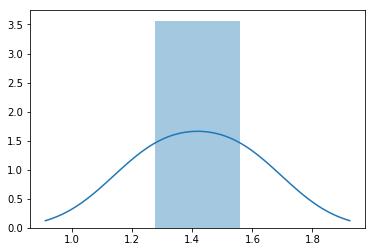

In [14]:
# display skewness of dataframe
target=df.skew()
sb.distplot(target)

In [15]:
# splitting data into train & test dataset
train,test=train_test_split(df,test_size=0.2)

In [16]:
print("train",train.shape)
print("test",test.shape)

train (13903, 2)
test (3476, 2)


In [17]:
# saving datasets into csv filesS
test.to_csv('Test/test_data.csv',index=False,encoding='utf-8')
train.to_csv('Train/train_data.csv',index=False,encoding='utf-8')


In [18]:
# loading training data csv file
train_df = pd.read_csv('train_data.csv')
train_df.head()

,registered,cnt
0,109,116
1,67,88
2,181,194
3,227,326
4,245,283


In [19]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_df,test_size=0.3)

In [20]:
# separating features and labels of training dataset
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values


In [21]:
# saving cross validation data into csv file
cv_data.to_csv('CrossValidate/cv_data.csv',index=False,encoding='utf-8')

In [22]:
# fitting simple linear regression model to the training dataset
# lin_reg = LinearRegression(normalize=True)  
# lin_reg.fit( x_train, y_train)  

# fitting polynomial regression model to the training dataset
poly_reg = PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
# fit into multiple Linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred=lin_reg2.predict(poly_reg.fit_transform(x_train))
pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})                                

,Actual,Predicted
0,275,259.267129
1,193,193.851431
2,12,12.649843
3,242,216.737789
4,126,134.467932
5,241,193.851431
6,93,111.764055
7,238,238.116405
8,44,46.102863
9,182,191.151377


In [24]:
# loading cross validation dataset file
cv_data = pd.read_csv('CrossValidate/cv_data.csv')
cv_data.head()

,registered,cnt
0,164,184
1,524,580
2,478,514
3,178,192
4,27,32


In [25]:
# separate labels and features of cross validation dataset
x_cv=cv_data.iloc[:,:-1].values
y_cv=cv_data.iloc[:,1].values

Accuracy of train data = 95.25028832758579
Accuracy of test data = 95.56014142254806


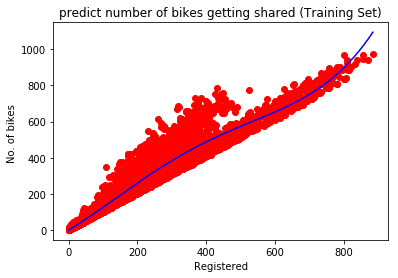

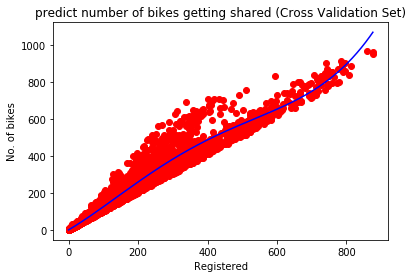

In [26]:
class PolynomialRegression:
    
    def fit_model(self,x_train,y_train):        
        # getting prediction values on train dataset
        y_pred_train=lin_reg2.predict(poly_reg.fit_transform(x_train))
        
        return y_pred_train
    
    def fit_model_cv(self,x_cv):
        # getting prediction values cross validation dataset 
        y_pred=lin_reg2.predict(poly_reg.fit_transform(x_cv))
        return y_pred
    
    def get_accuracy(self,y_train,y_pred):
        Accuracy = sklearn.metrics.r2_score(y_train,y_pred)*100
        return Accuracy
        
    def visualize_trainset(self,y_pred_train):
        # visualizing the training set result
        x_grid=np.arange(min(x_train),max(x_train),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_train,y_train,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict number of bikes getting shared (Training Set)')
        plt.xlabel('Registered')
        plt.ylabel('No. of bikes ')
        plt.show()
        
    def visualize_cvset(self,y_pred_test):
        # visualizing the testing set result
        x_grid=np.arange(min(x_cv),max(x_cv),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_cv,y_cv,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict number of bikes getting shared (Cross Validation Set)')
        plt.xlabel('Registered')
        plt.ylabel('No. of bikes')
        plt.show()
        
def main():
    # creates class object 
    obj = PolynomialRegression()
    y_pred_train = obj.fit_model(x_train,y_train)
    
    y_pred_test = obj.fit_model_cv(x_cv)
    
    acc_train = obj.get_accuracy(y_train,y_pred_train)
    print("Accuracy of train data =",acc_train)
    
    acc_test = obj.get_accuracy(y_cv,y_pred_test)
    print("Accuracy of test data =",acc_test)
     
    obj.visualize_trainset(y_pred_train)
    obj.visualize_cvset(y_pred_test)
    
if __name__ == '__main__':
    main()
    


In [27]:
fileObject = open("train_data.pkl",'wb')
pickle.dump(poly_reg,fileObject)  
pickle.dump(lin_reg2,fileObject)   
# here we close the fileObject
fileObject.close()